In [34]:
import fiona
from shapely.geometry import Polygon,mapping, LineString, shape
import rasterio 
import rasterio as rio
from rasterio import features
import rasterio.plot as rioplot
%matplotlib inline 
import geopandas as gp
import geojson

from  rasterio.transform  import Affine

In [35]:
DST_CRS = 'EPSG:4326'

RAW_IMAGES = '../data/raw/images'
RAW_LABELS = '../data/raw/labels'

TRAINING_DIR = '../data/train'
TRAINING_SAT_DIR = '{}/sat'.format(TRAINING_DIR)
TRAINING_MAP_DIR = '{}/map'.format(TRAINING_DIR)

In [36]:
rst=rasterio.open('{}/20170710_023840_0c75_3B_Visual.tif'.format(RAW_IMAGES),)
rst.transform()

In [37]:
with fiona.open("{}/walker_3093.geojson".format(RAW_LABELS), "r") as geojson:
    lines = [LineString(feature["geometry"]["coordinates"]) for feature in geojson]


In [38]:
shapes = ({'coordinates': [[(71.0, 6.0),
                   (71.0, 7.0),
                   (72.0, 7.0),
                   (72.0, 6.0),
                   (71.0, 6.0)]],
  'type': 'Polygon'},
253)

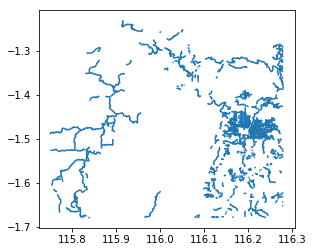

In [39]:
df  = gp.GeoDataFrame(geometry=lines,crs={'init': 'epsg:32750'})
fig=df.plot()


In [40]:
g=fiona.open("{}/walker_3093.geojson".format(RAW_LABELS))

In [41]:
bounds = (119.52, -21.6, 120.90, -20.5)

In [42]:
def  transform_from_corner(ulx, uly, dx, dy):
    return Affine.translation(ulx, uly)*Affine.scale(dx, -dy)

print(transform_from_corner(bounds[0], bounds[3], 1.0/3600, 1.0/3600).to_gdal())

(119.52, 0.0002777777777777778, 0.0, -20.5, 0.0, -0.0002777777777777778)


In [43]:
# image transform

transform = transform_from_corner(bounds[0], bounds[3], 1.0/3600, 1.0/3600)
poly = Polygon(((120, -21), (120.5, -21), (120.5, -21.2), (120, -21.2)))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


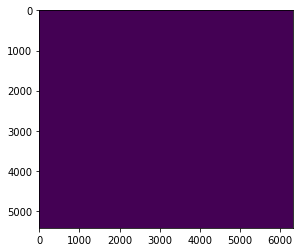

In [44]:
burned = features.rasterize([(line, 1) for line in lines], fill=255,transform=rst.transform,all_touched=True, out_shape=rst.shape)
print(burned)
rioplot.show(burned)